In [ ]:
#Which genre label to use? Letterboxd, TMDB, or IMDB

import os
import pandas as pd

df = pd.read_csv('cleaned_film_datset.csv')

df['genre_letterboxd'] = df['genre_letterboxd'].str.replace('[\[\]"]', '', regex=True)

# comparison_result = df['genre_letterboxd'].str.contains('|'.join(df['genre_tmdb']))

# false_results = df[~comparison_result]
# false_results

comparison_result = df['genre_imdb'].str.contains('|'.join(df['genre_tmdb']))
#comparison_result = df['genre_tmdb'].str.contains('|'.join(df['genre_imdb']))

false_results = df[~comparison_result]
false_results[['genre_imdb','genre_tmdb']]

def longest_string(row):
    if len(row['genre_imdb']) >= len(row['genre_tmdb']):
        return row['genre_imdb']
    else:
        return row['genre_tmdb']

# Apply the function to each row and create a new column
df['genre'] = df.apply(longest_string, axis=1)

df[['genre_imdb','genre_tmdb','genre']]

,genre_imdb,genre_tmdb,genre
0,"Biography, Drama, Romance",Drama,"Biography, Drama, Romance"
1,"Comedy, Romance","Comedy, Romance","Comedy, Romance"
2,"Action, Comedy, Romance","Action, Comedy, Thriller, Romance","Action, Comedy, Thriller, Romance"
3,"Drama, Romance","Drama, Romance","Drama, Romance"
4,"Action, Comedy, Crime","Action, Comedy, Crime","Action, Comedy, Crime"
...,...,...,...
11235,"Comedy, Romance","Comedy, Romance","Comedy, Romance"
11236,"Comedy, Drama, Family","Drama, Comedy, Family","Comedy, Drama, Family"
11237,"Animation, Action, Fantasy","Animation, Action, Fantasy","Animation, Action, Fantasy"
11238,"Drama, Sport",Drama,"Drama, Sport"


In [ ]:
#OneHotEncoding

import numpy as np

genres = np.unique(', '.join(df['genre']).split(', '))
#genres = np.delete(genres, np.where(genres == 'NA'))

for genre in genres:
    df[genre] = df['genre'].str.contains(genre).astype('int')

# from pathlib import Path
# filepath = Path('./results/one-hot-encoded.csv')
# filepath.parent.mkdir(parents=True, exist_ok=True)
# df.to_csv(filepath, index=True)

df.columns

Index(['Unnamed: 0', 'genre_letterboxd', 'imdb_id', 'title',
       'original_language', 'description_letterboxd', 'popularity',
       'production_countries', 'release_date', 'tmdb_id', 'rating_letterboxd',
       'vote_count_letterboxd', 'year', 'genre_imdb', 'rating_imdb',
       'description_imdb', 'director', 'director_id', 'star', 'star_id',
       'vote_count_imdb', 'gross', 'revenue', 'runtime', 'adult', 'budget',
       'description_tmdb', 'genre_tmdb', 'production_companies',
       'spoken_languages', 'genre', 'Action', 'Adult', 'Adventure',
       'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Science Fiction', 'Sport',
       'TV Movie', 'Thriller', 'War', 'Western'],
      dtype='object')

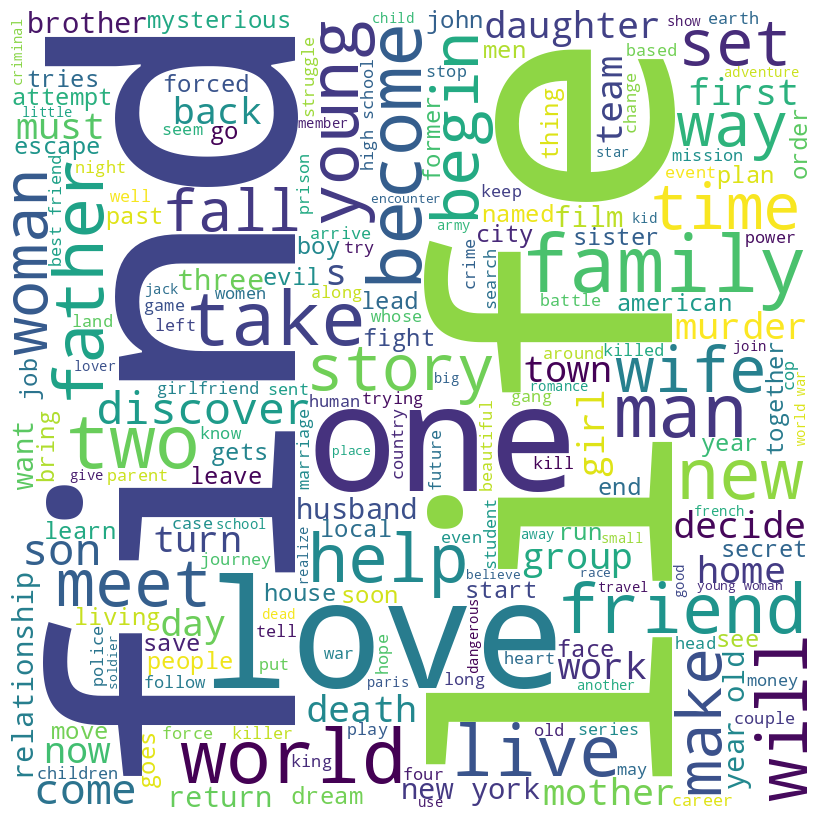

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

comment_words = ''
stopwords = set(STOPWORDS)

for val in df['description_letterboxd']:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

In [ ]:
df[['description_letterboxd','description_imdb', 'description_tmdb']]

,description_letterboxd,description_imdb,description_tmdb
0,George Jorgensen goes to 1950s Denmark and mak...,"A sex-change operation that changed ""George"" i...",Christine Jorgensen goes to 1950s Denmark and ...
1,Boy meets girl; boy falls in love (and had wil...,Jo and Gilly date. They find out they're broth...,Boy meets girl; boy falls in love (and had wil...
2,When an elite assassin marries a beautiful com...,"A vacationing woman meets her ideal man, leadi...",When an elite assassin marries a beautiful com...
3,Pierre and Manon are poor. They make documenta...,Pierre and Manon are a pair of poor documentar...,Pierre and Manon are poor. They make documenta...
4,Charlie and his troublesome cousin Paulie deci...,Two cousins unknowingly rob the mob and face t...,Charlie and his troublesome cousin Paulie deci...
...,...,...,...
11235,"""Baptists at Our Barbecue"" is the comedic stor...","Longwinded, USA: a small but divided, feuding ...","""Baptists at Our Barbecue"" is the comedic stor..."
11236,Paris 1930.\n Paul has only ever had one and t...,In 1920s France an orphan is adopted by a rust...,Paris 1930. Paul has only ever had one and the...
11237,Yuta Okkotsu is a nervous high school student ...,"Yuta Okkotsu, a high schooler who gains contro...",Yuta Okkotsu is a nervous high school student ...
11238,"An ex-boxer, living with the knowledge that hi...",A father whose boxing career was derailed chan...,"An ex-boxer, living with the knowledge that hi..."


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re


#custom_stop_words = ['find','one','two','life','man','woman','young','must','take','boy','girl']
stop_words = set(stopwords.words('english'))#+custom_stop_words)
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [(lemmatizer.lemmatize(word)) for word in tokens if word not in stop_words]
    return " ".join(tokens)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
df['description_imdb'] = df['description_imdb'].str.replace('See full summary','',regex=True)

df['description_letterboxd_processed'] = df['description_letterboxd'].apply(preprocess_text)
df['description_imdb_processed'] = df['description_imdb'].apply(preprocess_text)
df['description_tmdb_processed'] = df['description_tmdb'].apply(preprocess_text)

In [ ]:
for index, row in df.iterrows():
  df.at[index,'descriptions'] = row['description_letterboxd']+" "+row['description_imdb']+" "+row['description_tmdb']

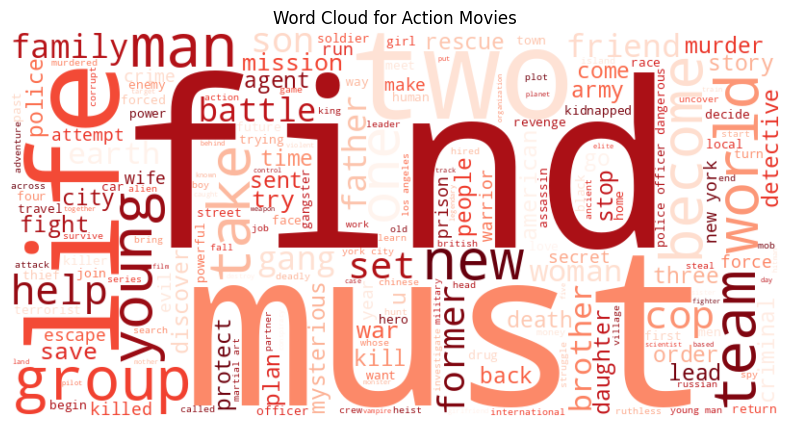

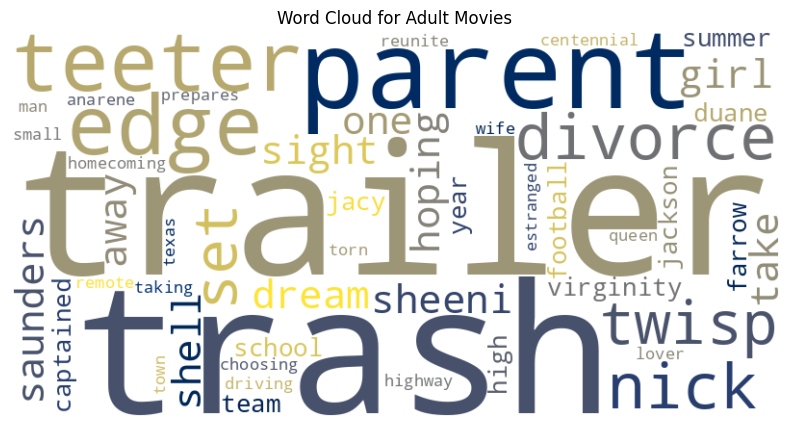

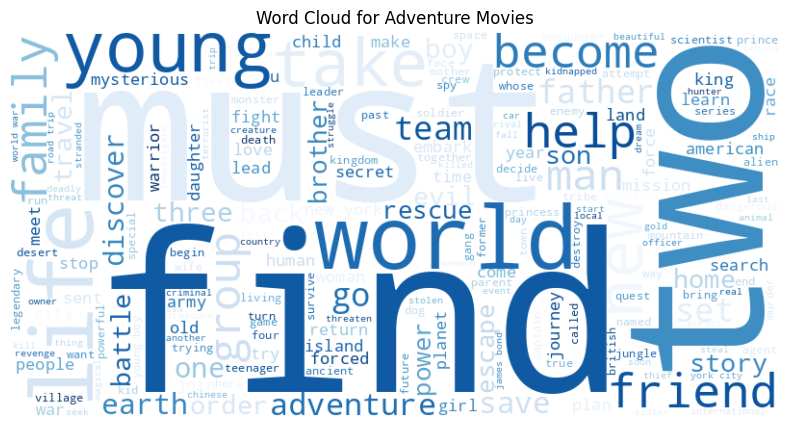

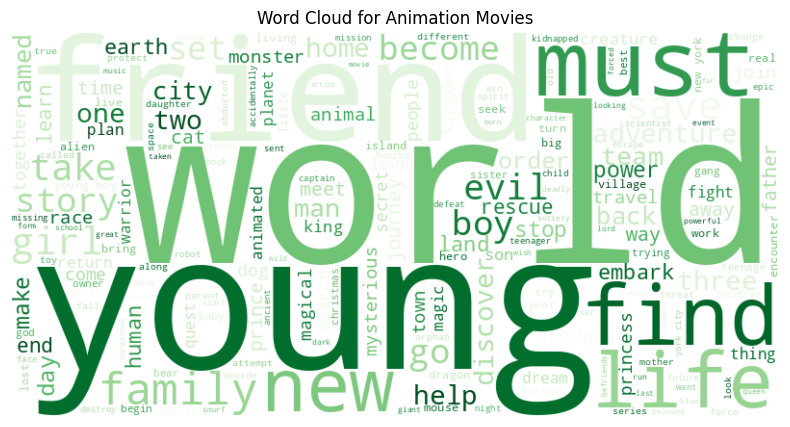

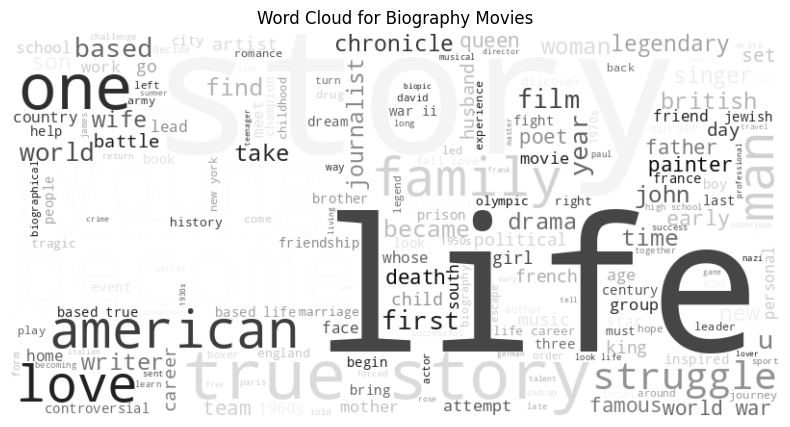

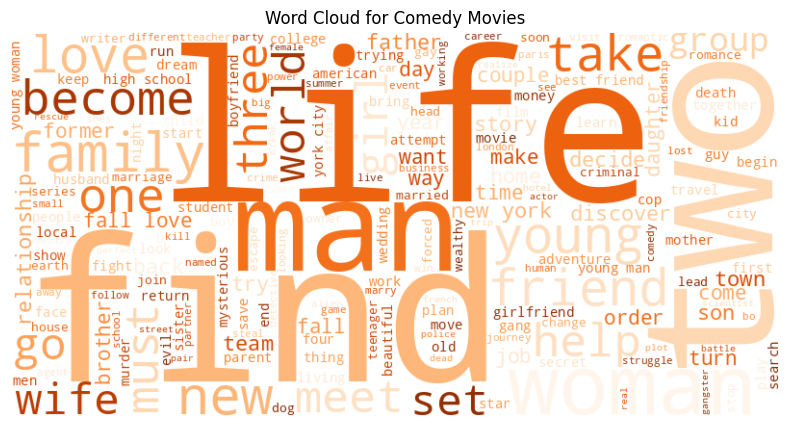

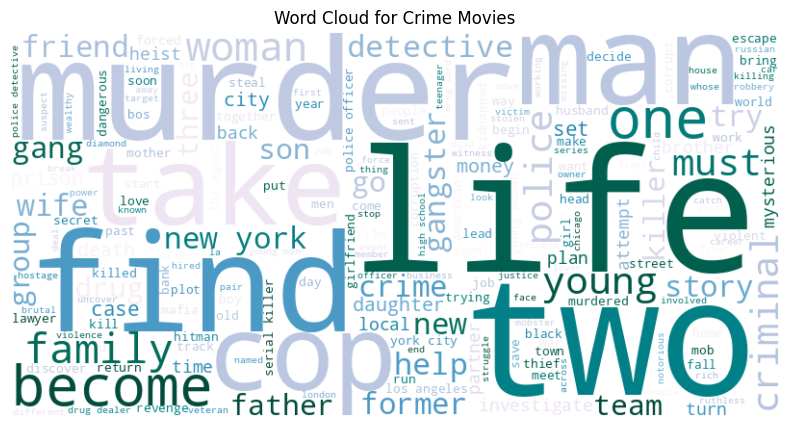

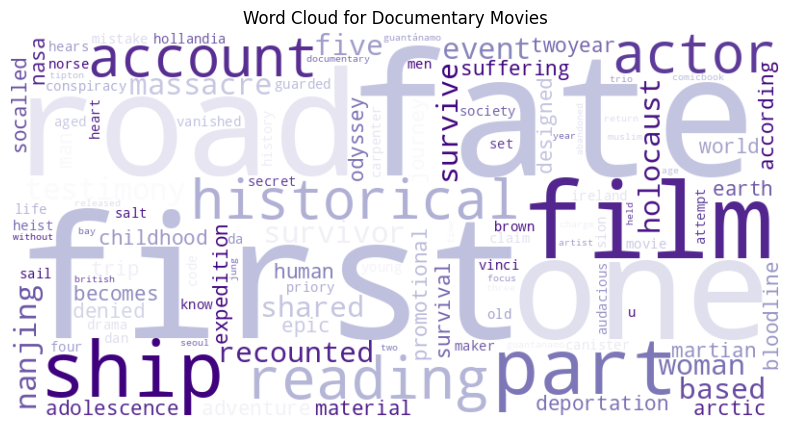

In [ ]:
genres = ['Action', 'Adult', 'Adventure','Animation', 'Biography', 'Comedy', 'Crime', 'Documentary',
          #'Drama','Family', 'Fantasy', 'Film-Noir', 'History', 'Horror', 'Music','Musical',
          #'Mystery', 'Romance', 'Sci-Fi', 'Science Fiction', 'Sport','TV Movie', 'Thriller', 'War',
          #'Western'
          ]

colormap_mapping = {
    'Action': 'Reds',  # Exciting and intense
    'Adult': 'cividis',  # Neutral and mature
    'Adventure': 'Blues',  # Expansive and adventurous
    'Animation': 'Greens',  # Bright and playful
    'Biography': 'Greys',  # Reflective and factual
    'Comedy': 'Oranges',  # Lighthearted and humorous
    'Crime': 'PuBuGn',  # Intense and gritty
    'Documentary': 'Purples',  # Informative and factual
    'Drama': 'YlOrBr',  # Emotional and introspective
    'Family': 'RdYlGn',  # Warm and inclusive
    'Fantasy': 'RdPu',  # Imaginative and magical
    'Film-Noir': 'RdYlBu',  # Dark and atmospheric
    'History': 'PuBu',  # Educational and enlightening
    'Horror': 'BuPu',  # Eerie and suspenseful
    'Music': 'YlGnBu',  # Uplifting and rhythmic
    'Musical': 'Wistia',  # Melodic and theatrical
    'Mystery': 'OrRd',  # Intriguing and suspenseful
    'Romance': 'RdGy',  # Passionate and romantic
    'Sci-Fi': 'GnBu',  # Futuristic and imaginative
    'Science Fiction': 'cubehelix',  # Speculative and visionary
    'Sport': 'coolwarm',  # Energetic and competitive
    'TV Movie': 'hot',  # Varied depending on theme
    'Thriller': 'plasma',  # Suspenseful and thrilling
    'War': 'inferno',  # Heroic and patriotic
    'Western': 'twilight'  # Frontier and adventurous
}

# output_dir = './results/lemmatization_only'
# if not os.path.exists(output_dir):
#     os.makedirs(output_dir)


for genre in genres:
    colormap = colormap_mapping.get(genre, 'viridis')
    genre_df = df[df[genre] == 1]
    text = ' '.join(genre_df['description_imdb_processed'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white',colormap=colormap).generate(text)

    #output_file = os.path.join(output_dir, f'{genre}_wordcloud.png')
    #wordcloud.to_file(output_file)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre} Movies')
    plt.axis('off')
    plt.show()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(df['descriptions'])

tfidf_matrix.shape

(11240, 34626)

In [ ]:
from sklearn.metrics.pairwise import linear_kernel

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

df['year'] = df['year'].astype(int)
df['title_with_year'] = df['title'] + ' (' + df['year'].astype(str) + ')'

indices = pd.Series(df.index, index=df['title_with_year']).drop_duplicates()

def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['title_with_year'].iloc[movie_indices]

In [ ]:
df['title_with_year']

In [ ]:
get_recommendations('Finding Nemo (2003)')

9587                                  Finding Dory (2016)
2584        Little Nemo: Adventures in Slumberland (1989)
4559                                    Mr. Nobody (2009)
6080                  20,000 Leagues Under the Sea (1954)
1192                  20,000 Leagues Under the Sea (1916)
3517                                    Shark Tale (2004)
7434              Teenage Mutant Ninja Turtles III (1993)
7665                                    Little Boy (2015)
3572    Teenage Mutant Ninja Turtles II: The Secret of...
970                                  Arizona Dream (1993)
Name: title_with_year, dtype: object

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

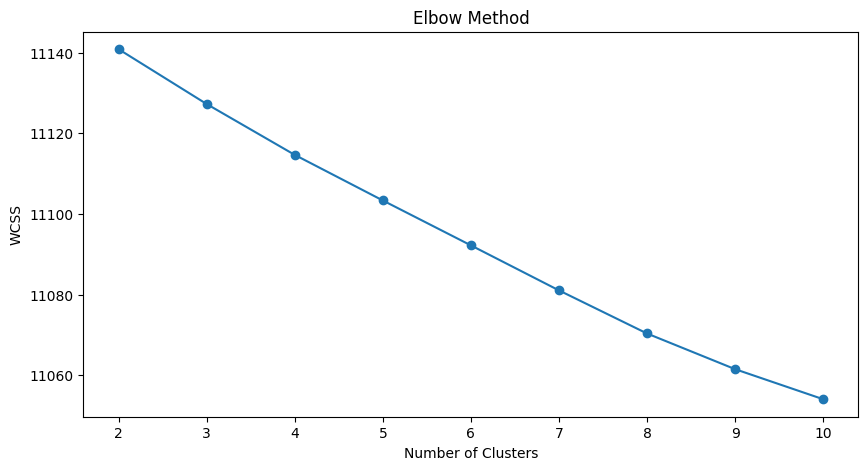

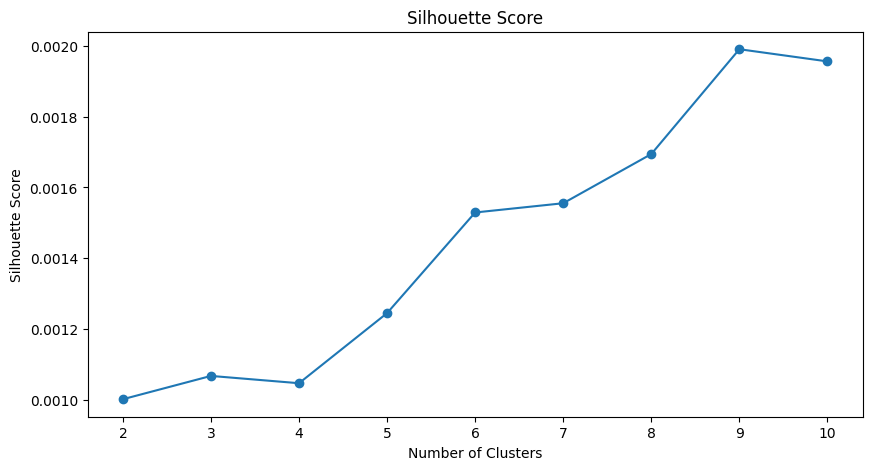

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
tfidf_df = pd.DataFrame(tfidf_matrix.toarray())
#tfidf_df.columns = tfidf_df.columns.astype(str)


# Generate data
X = tfidf_df

# Initialize lists to store WCSS and Silhouette Scores
wcss = []
silhouette_scores = []

# Try different numbers of clusters
for n_clusters in range(2, 11):
    # Fit KMeans clustering model
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)

    # Compute WCSS
    wcss.append(kmeans.inertia_)

    # Compute Silhouette Score
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

# Assuming tfidf_matrix contains your TF-IDF transformed data

# Initialize the k-means model with the desired number of clusters
num_clusters = 3  # Adjust this based on your data
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit the k-means model to your TF-IDF transformed data
kmeans_model.fit(tfidf_df)

# Get the cluster labels for each data point
cluster_labels = kmeans_model.labels_

# Now you can use these cluster labels for analysis or visualization

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Assuming tfidf_matrix contains your TF-IDF transformed data

# Initialize PCA and fit-transform the data
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_df)

# Initialize t-SNE and fit-transform the data
tsne = TSNE(n_components=2, random_state=42)
tfidf_tsne = tsne.fit_transform(tfidf_df)

#Plot PCA visualization
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(tfidf_pca[:, 0], tfidf_pca[:, 1], c=cluster_labels, cmap='viridis')
plt.title('PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

# Plot t-SNE visualization
plt.subplot(1, 2, 2)
plt.scatter(tfidf_tsne[:, 0], tfidf_tsne[:, 1], c=cluster_labels, cmap='viridis')
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()

plt.tight_layout()
plt.show()